## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from collections import Counter


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'])

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Export to better inspect
merge_df.to_csv('data/merge_df.csv', index=False)

In [3]:
merge_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [4]:
# Checking the number of mice.

numberofmice = len(merge_df['Mouse ID'].unique())
numberofmice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

micedupes = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
print(micedupes)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_number2 = len(clean_df['Mouse ID'].unique())
mouse_number2

248

In [8]:
clean_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']


# mean tumor volume for each regimen
mean_tumor_volume = tumor_volume.mean()


# median tumor volume for each regimen
median_tumor_volume = tumor_volume.median()


# variance tumor volume for each regimen
var_tumor_volume = tumor_volume.var()


# standard deviation tumor volume for each regimen
std_tumor_volume = tumor_volume.std()


# SEM tumor volume for each regimen
# Pandas dataframe.sem () function return unbiased standard error of the mean over requested axis. 
# The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its //
# sampling distribution [1] or an estimate of that standard deviation.
sem_tumor_volume = tumor_volume.sem()

stat_sum_dict = {
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance of Tumor Volume': var_tumor_volume,
    'STD of Tumor Volume': std_tumor_volume,
    'SEM of Tumor Volume': sem_tumor_volume
}
stat_sum_df = pd.DataFrame(stat_sum_dict)
stat_sum_df
    

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume2 = clean_df.groupby('Drug Regimen')

agg_prob = tumor_volume2.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_prob


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

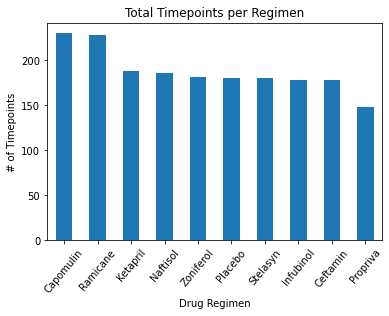

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_count = clean_df['Drug Regimen'].value_counts()

regimen_count.plot(kind='bar',rot=50, xlabel = 'Drug Regimen', ylabel='# of Timepoints')

plt.title("Total Timepoints per Regimen")

plt.show()

Text(0.5, 1.0, 'Total Timepoints per Regimen')

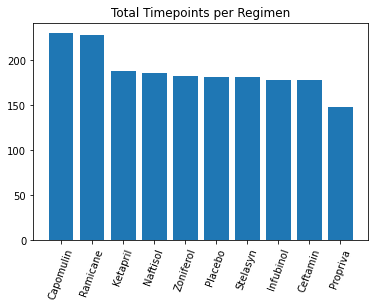

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(regimen_count.index.values, regimen_count.values)

plt.xticks(rotation=70)

plt.title("Total Timepoints per Regimen")

<AxesSubplot:ylabel='Sex'>

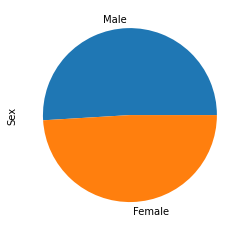

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count = clean_df['Sex'].value_counts()
sex_count.plot(kind='pie')

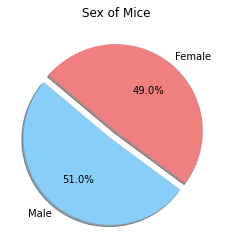

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Sex of Mice")

labels = sex_count.index.values
sizes = clean_df['Sex'].value_counts()
colors = ["lightskyblue", "lightcoral"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tp1 = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tp2 = pd.merge(final_tp1, clean_df, on = ('Mouse ID', 'Timepoint'))
final_tp2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
for regimen in regimen_list:
    
    drug_tumor_rows = final_tp2.loc[final_tp2['Drug Regimen'] == regimen][['Tumor Volume (mm3)']]
    
    tum_vol_list.append(drug_tumor_rows['Tumor Volume (mm3)'])
    
    quartiles = drug_tumor_rows['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outlier_tv = drug_tumor_rows.loc[(drug_tumor_rows['Tumor Volume (mm3)'] < lower_bound) | (drug_tumor_rows['Tumor Volume (mm3)'] > upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x23fddf37700>,
 'caps': [<matplotlib.lines.Line2D at 0x23fddf37d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fddf372b0>,
 'medians': [<matplotlib.lines.Line2D at 0x23fddf434c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x23fddf43850>,
 'means': []}

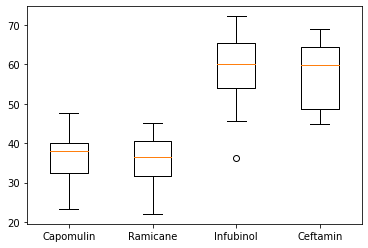

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tum_vol_list, labels = regimen_list)


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
